# Исследование объявлений о продаже квартир 

В данном проекте рассматриваются данные о продаже квартир в Санкт-Петербурге и соседних населенных пунктах. Изучены параметры, которые влияют на формирование цен недвижимости.

### Шаг 1. Откройте файл с данными и изучите общую информацию. 

In [1]:
import warnings
warnings.filterwarnings('ignore')


In [2]:
import pandas as pd
df= pd.read_csv('/datasets/real_estate_data.csv', sep='\t')
df.info()
df.head(5)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
total_images            23699 non-null int64
last_price              23699 non-null float64
total_area              23699 non-null float64
first_day_exposition    23699 non-null object
rooms                   23699 non-null int64
ceiling_height          14504 non-null float64
floors_total            23613 non-null float64
living_area             21796 non-null float64
floor                   23699 non-null int64
is_apartment            2775 non-null object
studio                  23699 non-null bool
open_plan               23699 non-null bool
kitchen_area            21421 non-null float64
balcony                 12180 non-null float64
locality_name           23650 non-null object
airports_nearest        18157 non-null float64
cityCenters_nearest     18180 non-null float64
parks_around3000        18181 non-null float64
parks_nearest           8079 non-null float64
ponds_around300

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.0,2019-03-07T00:00:00,3,2.70,16.0,51.0,8,NaN,...,25.0,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.4,2018-12-04T00:00:00,1,NaN,11.0,18.6,1,NaN,...,11.0,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.0,2015-08-20T00:00:00,2,NaN,5.0,34.3,4,NaN,...,8.3,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.0,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,...,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.0,2018-06-19T00:00:00,2,3.03,14.0,32.0,13,NaN,...,41.0,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0


### Вывод

- Существуют пропуски в столбцах 'ceiling_height', 'floors_total', 'living_area', 'floor', 'is_apartment', 'kitchen_area', 'balcony',airports_nearest', 'cityCenters_nearest', 'parks_around3000', 'parks_nearest', 'ponds_around3000', 'parks_nearest', 'ponds_around3000', 'parks_nearest', 'ponds_around3000', 'ponds_nearest', 'days_exposition'. 
- Столбец 'first_day_exposition' имеет тип Object, хотя там хранится время.
- Многие столбцы с вещественными данными не имеют знаков после запятой, их лучше убрать и сэкономить на памяти и системных ресурсах 
- 'is_apartment'- должен иметь булев тип, хотя здесь имеет тип 'object'.       
- данные в столбцах, которые делаются  автоматически на основе картографических данных, могут оставаться пустыми в случае, если ближайший аэропорт, парк и т.д. настолько далеко, что система не смогла ничего отыскать
- множество пропусков в булевых переменных может быть связязно с тем что пользователи расставляют акценты на преимуществах или самой необходимой информации и опускают то, что не связано с их квартирой(близость прудов, парков и т.д.)

#### Поиск дубликатов 

In [3]:
df.duplicated().sum()

0

In [4]:
df['locality_name']=df['locality_name'].fillna('Неизвестно') 

In [5]:
df['locality_name']=df['locality_name'].str.lower()
df.duplicated().sum()

0

Пока что дубликаты нигде не просматривются.

#### Заполнение пропусков 

Пропуски могли оказаться из-за того, что не все пользователи считают нужным указывать полную информацию по жилплощади. И далеко не все  пропуски можно заполнить, тем не менее:

- заменим NaNы  в 'balcony','parks_around3000','ponds_around3000' предполагая, что там, где число не указано, требуемого просто нет. Все эти сведения заполняются теми, кто продает квартиру и им было бы выгодно указать наличие балкона, парка и т.д.
- так же в столбце 'is_apartment' может быть не указано ничего там, где жилплощадь не является аппартаментами 

In [6]:
list_0=['balcony','is_apartment','parks_around3000','ponds_around3000']
df[list_0]=df[list_0].fillna(0)

#list_=['ceiling_height','floors_total','living_area','cityCenters_nearest','parks_nearest','kitchen_area','airports_nearest','ponds_around3000','ponds_nearest','days_exposition']
#df[list_]=df[list_].fillna(-10)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
total_images            23699 non-null int64
last_price              23699 non-null float64
total_area              23699 non-null float64
first_day_exposition    23699 non-null object
rooms                   23699 non-null int64
ceiling_height          14504 non-null float64
floors_total            23613 non-null float64
living_area             21796 non-null float64
floor                   23699 non-null int64
is_apartment            23699 non-null object
studio                  23699 non-null bool
open_plan               23699 non-null bool
kitchen_area            21421 non-null float64
balcony                 23699 non-null float64
locality_name           23699 non-null object
airports_nearest        18157 non-null float64
cityCenters_nearest     18180 non-null float64
parks_around3000        23699 non-null float64
parks_nearest           8079 non-null float64
ponds_around30

Для заполнения пропусков разумно посмотреть как переменные коррелируют друг с другом.

In [7]:
df_corr=df.corr()
df_corr

,total_images,last_price,total_area,rooms,ceiling_height,floors_total,living_area,floor,studio,open_plan,kitchen_area,balcony,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
total_images,1.000000,0.104473,0.115352,0.099288,-0.001987,0.010427,0.104780,0.031340,-0.029303,-0.024407,0.104756,0.048903,-0.002298,-0.047666,0.037085,-0.008347,0.011323,-0.003034,-0.026657
last_price,0.104473,1.000000,0.653675,0.363343,0.085430,-0.006984,0.566492,0.026576,-0.025362,-0.008802,0.519869,0.008559,-0.026239,-0.206747,0.197840,-0.016414,0.208621,-0.084809,0.081146
total_area,0.115352,0.653675,1.000000,0.758344,0.095490,-0.075774,0.939537,-0.024754,-0.072653,-0.034885,0.609121,0.009941,-0.030753,-0.231446,0.200211,-0.021497,0.200294,-0.097969,0.149675
rooms,0.099288,0.363343,0.758344,1.000000,0.054457,-0.228215,0.845977,-0.150862,-0.147286,-0.087500,0.269945,-0.015519,-0.061199,-0.184864,0.157495,-0.054549,0.121276,-0.057689,0.126961
ceiling_height,-0.001987,0.085430,0.095490,0.054457,1.000000,-0.028732,0.090650,-0.011798,0.001674,0.042777,0.087641,0.031216,-0.023947,-0.091689,0.062216,-0.019167,0.072343,-0.059090,0.019091
floors_total,0.010427,-0.006984,-0.075774,-0.228215,-0.028732,1.000000,-0.169311,0.678059,0.070151,0.050791,0.163944,0.172812,0.108288,0.019774,-0.158775,0.097527,-0.048698,0.038864,-0.052234
living_area,0.104780,0.566492,0.939537,0.845977,0.090650,-0.169311,1.000000,-0.097210,-0.056231,-0.033711,0.428674,-0.014772,-0.057912,-0.231368,0.212357,-0.050167,0.182439,-0.081674,0.142454
floor,0.031340,0.026576,-0.024754,-0.150862,-0.011798,0.678059,-0.097210,1.000000,0.036940,0.035824,0.135531,0.168567,0.071597,0.009084,-0.105212,0.073045,-0.029710,0.024850,-0.039463
studio,-0.029303,-0.025362,-0.072653,-0.147286,0.001674,0.070151,-0.056231,0.036940,1.000000,-0.004235,NaN,0.028899,-0.021876,-0.007029,-0.032014,0.009134,-0.009690,0.002606,-0.022476
open_plan,-0.024407,-0.008802,-0.034885,-0.087500,0.042777,0.050791,-0.033711,0.035824,-0.004235,1.000000,NaN,0.032639,-0.013583,-0.004204,-0.016378,0.010612,-0.004127,-0.003328,-0.024112


In [8]:
df.describe()

,total_images,last_price,total_area,rooms,ceiling_height,floors_total,living_area,floor,kitchen_area,balcony,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
count,23699.000000,2.369900e+04,23699.000000,23699.000000,14504.000000,23613.000000,21796.000000,23699.000000,21421.000000,23699.000000,18157.000000,18180.000000,23699.000000,8079.000000,23699.000000,9110.000000,20518.000000
mean,9.858475,6.541549e+06,60.348651,2.070636,2.771499,10.673824,34.457852,5.892358,10.569807,0.591080,28793.672193,14191.277833,0.469049,490.804555,0.590911,517.980900,180.888634
std,5.682529,1.088701e+07,35.654083,1.078405,1.261056,6.597173,22.030445,4.885249,5.905438,0.959298,12630.880622,8608.386210,0.748534,342.317995,0.883999,277.720643,219.727988
min,0.000000,1.219000e+04,12.000000,0.000000,1.000000,1.000000,2.000000,1.000000,1.300000,0.000000,0.000000,181.000000,0.000000,1.000000,0.000000,13.000000,1.000000
25%,6.000000,3.400000e+06,40.000000,1.000000,2.520000,5.000000,18.600000,2.000000,7.000000,0.000000,18585.000000,9238.000000,0.000000,288.000000,0.000000,294.000000,45.000000
50%,9.000000,4.650000e+06,52.000000,2.000000,2.650000,9.000000,30.000000,4.000000,9.100000,0.000000,26726.000000,13098.500000,0.000000,455.000000,0.000000,502.000000,95.000000
75%,14.000000,6.800000e+06,69.900000,3.000000,2.800000,16.000000,42.300000,8.000000,12.000000,1.000000,37273.000000,16293.000000,1.000000,612.000000,1.000000,729.000000,232.000000
max,50.000000,7.630000e+08,900.000000,19.000000,100.000000,60.000000,409.700000,33.000000,112.000000,5.000000,84869.000000,65968.000000,3.000000,3190.000000,3.000000,1344.000000,1580.000000


Поиск корреляций для заполнения данных

In [9]:
df_corr=df.corr()
df_corr=df_corr[abs(df_corr)>0.5]
df_corr

,total_images,last_price,total_area,rooms,ceiling_height,floors_total,living_area,floor,studio,open_plan,kitchen_area,balcony,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
total_images,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
last_price,NaN,1.000000,0.653675,NaN,NaN,NaN,0.566492,NaN,NaN,NaN,0.519869,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
total_area,NaN,0.653675,1.000000,0.758344,NaN,NaN,0.939537,NaN,NaN,NaN,0.609121,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
rooms,NaN,NaN,0.758344,1.000000,NaN,NaN,0.845977,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
ceiling_height,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
floors_total,NaN,NaN,NaN,NaN,NaN,1.000000,NaN,0.678059,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
living_area,NaN,0.566492,0.939537,0.845977,NaN,NaN,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
floor,NaN,NaN,NaN,NaN,NaN,0.678059,NaN,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
studio,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
open_plan,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


- Существует корреляция между количеством этажей и указанным этажом, из этих данных можно восполнить пропуски для столбцов 'floor' и 'floors_total'. И хотя квартира на 2 этаже может находится и в двадцатиэтажном доме, данного значения корреляции достаточно для заполнения пропусков.
- у жилой площади 'living_area' наибольшая  и логичная коhреляция с общей площадью 'total_area'. Пропущенные значения в  'living_area' можно восполнить как среднюю долю от общей жилплощади среди имеющихся данных.

Заполнение столбцов 'floor' и 'floors_total'

In [10]:
list_fl=['floor','floors_total']

In [11]:
df[list_fl]=df[list_fl].fillna(0)

In [12]:
for floor in df['floor'].unique():
        df.loc[(df['floor']==0)&(df['floor']==floor),'floor'] = df.loc[(df['floor'] == floor)&(df['floors_total'] != 0),'floors_total'].median()

In [13]:
for floors_total in df['floors_total'].unique():
        df.loc[(df['floors_total']==0)&(df['floors_total']==floors_total),'floors_total'] = df.loc[(df['floors_total'] == floors_total)&(df['floor'] != 0),'floor'].median()

Заполнение столбца 'жилая площадь'

In [14]:
df['pr_living_area']=df['living_area']/df['total_area']
pr_living_area=df['pr_living_area'].mean()

In [15]:
df['living_area']=df['living_area'].fillna(df['total_area']*pr_living_area)    

Заполнение столбца 'площадь кухни'

In [16]:
df['pr_kitchen_area']=df['kitchen_area']/df['total_area']
pr_kitchen_area=df['pr_kitchen_area'].mean()

In [17]:
df['kitchen_area']=df['kitchen_area'].fillna(df['total_area']*pr_living_area)    

In [18]:
df.isnull().sum()

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height           9195
floors_total                0
living_area                 0
floor                       0
is_apartment                0
studio                      0
open_plan                   0
kitchen_area                0
balcony                     0
locality_name               0
airports_nearest         5542
cityCenters_nearest      5519
parks_around3000            0
parks_nearest           15620
ponds_around3000            0
ponds_nearest           14589
days_exposition          3181
pr_living_area           1903
pr_kitchen_area          2278
dtype: int64


Среднюю высоту потолков можно восполнить по этажности, близость к аэропорту,парку, прудам, количество дней размещения - по локации, близость к центру можно восполнить по локации.

In [19]:
df['ceiling_height']=df['ceiling_height'].fillna(0)
for floors_total in df['floors_total'].unique():
        df.loc[(df['ceiling_height']==0)&(df['floors_total']==floors_total),'ceiling_height'] = df.loc[(df['floors_total'] == floors_total)&(df['ceiling_height'] != 0),'ceiling_height'].median()

In [20]:
mean_for_null=df.pivot_table(index='locality_name',values=['airports_nearest','cityCenters_nearest','parks_nearest','ponds_nearest','days_exposition'])
mean_for_null

,airports_nearest,cityCenters_nearest,days_exposition,parks_nearest,ponds_nearest
locality_name,,,,,
бокситогорск,NaN,NaN,89.571429,NaN,NaN
волосово,NaN,NaN,279.516129,NaN,NaN
волхов,NaN,NaN,152.400000,NaN,NaN
всеволожск,NaN,NaN,197.085546,NaN,NaN
выборг,NaN,NaN,177.375000,NaN,NaN
...,...,...,...,...,...
сосновый бор,NaN,NaN,99.594595,NaN,NaN
сясьстрой,NaN,NaN,154.647059,NaN,NaN
тихвин,NaN,NaN,94.575000,NaN,NaN


In [21]:
columns_null=['airports_nearest','cityCenters_nearest','days_exposition','parks_nearest','ponds_nearest']

In [22]:
df[columns_null]=df[columns_null].fillna(0)

In [23]:
for columns in columns_null:
        for locality_name in df['locality_name'].unique():
            df.loc[(df[columns]==0)&(df['locality_name']==locality_name),columns] = df.loc[(df['locality_name'] == locality_name)&(df[columns] != 0),columns].mean()           

In [24]:
df[columns_null].replace(0,-999)
df[columns_null]=df[columns_null].fillna(-999)

In [25]:
df[df[columns_null]<0].count()

total_images               0
last_price                 0
total_area                 0
first_day_exposition       0
rooms                      0
ceiling_height             0
floors_total               0
living_area                0
floor                      0
is_apartment               0
studio                     0
open_plan                  0
kitchen_area               0
balcony                    0
locality_name              0
airports_nearest        5386
cityCenters_nearest     5386
parks_around3000           0
parks_nearest           5998
ponds_around3000           0
ponds_nearest           5494
days_exposition           80
pr_living_area             0
pr_kitchen_area            0
dtype: int64

Некоторые столбцы не представляется возможным полностью заполнить, потому что не везде есть парк, пруд, некоторые города настолько далеки от аэропорта, что трудно установить расстояние до них. Поскольку для установления цены влияет роль именно близость аэропорта (шум, экология), эти NaNы не являются критичными. Так же NaNы в столбце с удаленностью от центра можно рассматривать просто как "очень далеко"(иначе эти числа были бы либо даны изначально, либо заполнены по локациям). 

#### Изменение типа данных

- Преобразование строк столбца 'first_day_exposition' во время.

In [26]:
df['first_day_exposition']=pd.to_datetime(df['first_day_exposition'],format ='%Y-%m-%dT%H:%M:%S')
df.head(5)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,pr_living_area,pr_kitchen_area
0,20,13000000.0,108.0,2019-03-07,3,2.70,16.0,51.000000,8.0,0,...,санкт-петербург,18863.0,16028.0,1.0,482.0,2.0,755.000000,182.792198,0.472222,0.231481
1,7,3350000.0,40.4,2018-12-04,1,2.75,11.0,18.600000,1.0,0,...,посёлок шушары,12817.0,18603.0,0.0,-999.0,0.0,573.217105,81.000000,0.460396,0.272277
2,10,5196000.0,56.0,2015-08-20,2,2.55,5.0,34.300000,4.0,0,...,санкт-петербург,21741.0,13933.0,1.0,90.0,2.0,574.000000,558.000000,0.612500,0.148214
3,0,64900000.0,159.0,2015-07-24,3,2.60,14.0,89.797718,9.0,0,...,санкт-петербург,28098.0,6800.0,2.0,84.0,3.0,234.000000,424.000000,NaN,NaN
4,2,10000000.0,100.0,2018-06-19,2,3.03,14.0,32.000000,13.0,0,...,санкт-петербург,31856.0,8098.0,2.0,112.0,1.0,48.000000,121.000000,0.320000,0.410000


- Преобразование вещественных типов в целочисленные. Замена производится в тех столбцах, где не может идти речи о вещественных значениях( этаж,этажность, количество балконов и т.д.). В данных о расстоянии нет надобности хранить информацию о долях метров, и никто не указывает копейки при продаже квартир.

NaNы заменяются на "-999", чтобы не было путаницы с нулевыми значениями.

In [27]:
list_float=['floors_total','floor','balcony','airports_nearest','last_price','cityCenters_nearest','parks_around3000','parks_nearest','ponds_around3000','ponds_nearest','days_exposition']
df[list_float]=df[list_float].fillna(-999)
df[list_float]=df[list_float].astype('int')
df.head(5)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,pr_living_area,pr_kitchen_area
0,20,13000000,108.0,2019-03-07,3,2.70,16,51.000000,8,0,...,санкт-петербург,18863,16028,1,482,2,755,182,0.472222,0.231481
1,7,3350000,40.4,2018-12-04,1,2.75,11,18.600000,1,0,...,посёлок шушары,12817,18603,0,-999,0,573,81,0.460396,0.272277
2,10,5196000,56.0,2015-08-20,2,2.55,5,34.300000,4,0,...,санкт-петербург,21741,13933,1,90,2,574,558,0.612500,0.148214
3,0,64900000,159.0,2015-07-24,3,2.60,14,89.797718,9,0,...,санкт-петербург,28098,6800,2,84,3,234,424,NaN,NaN
4,2,10000000,100.0,2018-06-19,2,3.03,14,32.000000,13,0,...,санкт-петербург,31856,8098,2,112,1,48,121,0.320000,0.410000


In [28]:
df.describe()

,total_images,last_price,total_area,rooms,ceiling_height,floors_total,living_area,floor,kitchen_area,balcony,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,pr_living_area,pr_kitchen_area
count,23699.000000,2.369900e+04,23699.000000,23699.000000,23698.000000,23699.000000,23699.000000,23699.000000,23699.000000,23699.000000,23699.000000,23699.000000,23699.000000,23699.000000,23699.000000,23699.000000,23699.000000,21796.000000,21421.000000
mean,9.858475,6.541549e+06,60.348651,2.070636,2.736141,10.664121,34.562480,5.892358,12.625110,0.591080,22081.352293,10767.660745,0.469049,114.566353,0.590911,167.233554,176.969366,0.564766,0.187355
std,5.682529,1.088701e+07,35.654083,1.078405,0.994290,6.587154,22.326965,4.885249,11.064421,0.959298,16754.146045,9909.778645,0.748534,678.503370,0.883999,663.755662,216.052257,0.105368,0.072968
min,0.000000,1.219000e+04,12.000000,0.000000,1.000000,1.000000,2.000000,1.000000,1.300000,0.000000,-999.000000,-999.000000,0.000000,-999.000000,0.000000,-999.000000,-999.000000,0.021583,0.025381
25%,6.000000,3.400000e+06,40.000000,1.000000,2.550000,5.000000,19.000000,2.000000,7.350976,0.000000,10663.000000,2561.500000,0.000000,-999.000000,0.000000,87.500000,45.000000,0.495177,0.133333
50%,9.000000,4.650000e+06,52.000000,2.000000,2.650000,9.000000,30.000000,4.000000,10.000000,0.000000,22068.000000,11348.000000,0.000000,498.000000,0.000000,520.000000,120.000000,0.567860,0.172414
75%,14.000000,6.800000e+06,69.900000,3.000000,2.750000,16.000000,42.100000,8.000000,13.400000,1.000000,34496.500000,15319.000000,1.000000,498.000000,1.000000,520.000000,209.000000,0.637880,0.232416
max,50.000000,7.630000e+08,900.000000,19.000000,100.000000,60.000000,409.700000,33.000000,282.382761,5.000000,84869.000000,65968.000000,3.000000,3190.000000,3.000000,1344.000000,1580.000000,1.000000,0.787879


В столбце 'сeiling_height' cуществуют неправдоподобно большие и неправдопдобно маленькие значения (минимальная высота ниже  человеческого роста). 

В столбце 'сeiling_height' значения можно заменить на медианное число среди правдоподобных ( обычно высота потолков от 2.5 до 4.5 метров)

In [29]:
cel_h_median= df.query('2.40<=ceiling_height<=4.50')
cel_h_median_m=cel_h_median['ceiling_height'].median()
cel_h_median_m

2.65

In [30]:
df['ceiling_height']=df['ceiling_height'].replace((df.loc[((df['ceiling_height']<=2.40)|(df['ceiling_height']>=4.50)),'ceiling_height']), cel_h_median_m)

## Вывод

Анализируя корреляцию, были заполнены пропуски. Также были отсеяны неправдоподобные значения.

#### цена квадратного метра

In [31]:
df['pice_square']=df['last_price']/df['total_area']
df.head(5)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,pr_living_area,pr_kitchen_area,pice_square
0,20,13000000,108.0,2019-03-07,3,2.70,16,51.000000,8,0,...,18863,16028,1,482,2,755,182,0.472222,0.231481,120370.370370
1,7,3350000,40.4,2018-12-04,1,2.75,11,18.600000,1,0,...,12817,18603,0,-999,0,573,81,0.460396,0.272277,82920.792079
2,10,5196000,56.0,2015-08-20,2,2.55,5,34.300000,4,0,...,21741,13933,1,90,2,574,558,0.612500,0.148214,92785.714286
3,0,64900000,159.0,2015-07-24,3,2.60,14,89.797718,9,0,...,28098,6800,2,84,3,234,424,NaN,NaN,408176.100629
4,2,10000000,100.0,2018-06-19,2,3.03,14,32.000000,13,0,...,31856,8098,2,112,1,48,121,0.320000,0.410000,100000.000000


#### день недели, месяц и год публикации объявления

In [35]:
df['first_day_month']= pd.DatetimeIndex(df['first_day_exposition']).day_name()
df['first_day_week']=pd.DatetimeIndex(df['first_day_exposition']).month_name()
df

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,pr_living_area,pr_kitchen_area,pice_square,first_day_year,first_day_month,first_day_week
0,20,13000000,108.00,2019-03-07,3,2.70,16,51.000000,8,0,...,482,2,755,182,0.472222,0.231481,120370.370370,2019,Thursday,March
1,7,3350000,40.40,2018-12-04,1,2.75,11,18.600000,1,0,...,-999,0,573,81,0.460396,0.272277,82920.792079,2018,Tuesday,December
2,10,5196000,56.00,2015-08-20,2,2.55,5,34.300000,4,0,...,90,2,574,558,0.612500,0.148214,92785.714286,2015,Thursday,August
3,0,64900000,159.00,2015-07-24,3,2.60,14,89.797718,9,0,...,84,3,234,424,NaN,NaN,408176.100629,2015,Friday,July
4,2,10000000,100.00,2018-06-19,2,3.03,14,32.000000,13,0,...,112,1,48,121,0.320000,0.410000,100000.000000,2018,Tuesday,June
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23694,9,9700000,133.81,2017-03-21,3,3.70,5,73.300000,3,0,...,796,3,381,182,0.547792,0.103356,72490.845228,2017,Tuesday,March
23695,14,3100000,59.00,2018-01-15,3,2.55,5,38.000000,4,0,...,-999,0,-999,45,0.644068,0.144068,52542.372881,2018,Monday,January
23696,18,2500000,56.70,2018-02-11,2,2.80,3,29.700000,1,0,...,-999,0,-999,99,0.523810,NaN,44091.710758,2018,Sunday,February
23697,13,11475000,76.75,2017-03-28,2,3.00,17,43.345754,12,0,...,173,3,196,602,NaN,0.303583,149511.400651,2017,Tuesday,March


#### этаж квартиры; варианты — первый, последний, другой


In [36]:
df['floor_desc']=''
df.loc[df['floor']==1,'floor_desc']='первый'
df.loc[df['floor']==df['floors_total'],'floor_desc']='последний'
df.loc[(df['floor']!=df['floors_total'])&(df['floor']!=1),'floor_desc']='другой'
df.head(15)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,ponds_around3000,ponds_nearest,days_exposition,pr_living_area,pr_kitchen_area,pice_square,first_day_year,first_day_month,first_day_week,floor_desc
0,20,13000000,108.00,2019-03-07,3,2.70,16,51.000000,8,0,...,2,755,182,0.472222,0.231481,120370.370370,2019,Thursday,March,другой
1,7,3350000,40.40,2018-12-04,1,2.75,11,18.600000,1,0,...,0,573,81,0.460396,0.272277,82920.792079,2018,Tuesday,December,первый
2,10,5196000,56.00,2015-08-20,2,2.55,5,34.300000,4,0,...,2,574,558,0.612500,0.148214,92785.714286,2015,Thursday,August,другой
3,0,64900000,159.00,2015-07-24,3,2.60,14,89.797718,9,0,...,3,234,424,NaN,NaN,408176.100629,2015,Friday,July,другой
4,2,10000000,100.00,2018-06-19,2,3.03,14,32.000000,13,0,...,1,48,121,0.320000,0.410000,100000.000000,2018,Tuesday,June,другой
5,10,2890000,30.40,2018-09-10,1,2.65,12,14.400000,5,0,...,0,-999,55,0.473684,0.299342,95065.789474,2018,Monday,September,другой
6,6,3700000,37.30,2017-11-02,1,2.66,26,10.600000,6,0,...,0,598,155,0.284182,0.386059,99195.710456,2017,Thursday,November,другой
7,5,7915000,71.60,2019-04-18,2,2.75,24,40.437211,22,0,...,0,520,182,NaN,0.263966,110544.692737,2019,Thursday,April,другой
8,20,2900000,33.16,2018-05-23,1,2.70,27,15.430000,26,0,...,0,-999,189,0.465320,0.265682,87454.764777,2018,Wednesday,May,другой
9,18,5400000,61.00,2017-02-26,3,2.50,9,43.600000,7,0,...,0,520,289,0.714754,0.106557,88524.590164,2017,Sunday,February,другой


####  соотношение жилой и общей площади, а также отношение площади кухни к общей

И хотя эти значения уже были посчитаны при заполнении пропусков, в некоторых строках могли остаться NаN'ы.

In [37]:
df['pr_kitchen_area']=df['kitchen_area']/df['total_area']
df['pr_living_area']=df['living_area']/df['total_area']

In [39]:
column_in_int=['total_area','living_area','kitchen_area','pice_square']
df[column_in_int]=df[column_in_int].astype('int')
df['is_apartment']=df['is_apartment'].astype('bool')

In [40]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 29 columns):
total_images            23699 non-null int64
last_price              23699 non-null int64
total_area              23699 non-null int64
first_day_exposition    23699 non-null datetime64[ns]
rooms                   23699 non-null int64
ceiling_height          23698 non-null float64
floors_total            23699 non-null int64
living_area             23699 non-null int64
floor                   23699 non-null int64
is_apartment            23699 non-null bool
studio                  23699 non-null bool
open_plan               23699 non-null bool
kitchen_area            23699 non-null int64
balcony                 23699 non-null int64
locality_name           23699 non-null object
airports_nearest        23699 non-null int64
cityCenters_nearest     23699 non-null int64
parks_around3000        23699 non-null int64
parks_nearest           23699 non-null int64
ponds_around3000        236

### Шаг 4. Проведите исследовательский анализ данных и выполните инструкции:

Через метод 'describe' просматривются минимальные, среднее значения для определения оптимальных границ графиков.

In [42]:
list_hist=['total_area','last_price','rooms','ceiling_height']
list_hist_des=df[list_hist].describe()
list_hist_des

,total_area,last_price,rooms,ceiling_height
count,23699.000000,2.369900e+04,23699.000000,23698.000000
mean,60.120511,6.541549e+06,2.070636,2.706875
std,35.665822,1.088701e+07,1.078405,0.224292
min,12.000000,1.219000e+04,0.000000,2.450000
25%,40.000000,3.400000e+06,1.000000,2.550000
50%,52.000000,4.650000e+06,2.000000,2.650000
75%,69.000000,6.800000e+06,3.000000,2.750000
max,900.000000,7.630000e+08,19.000000,4.450000


In [43]:
list_hist_des.loc['bins'] = [50, 50, 10,20]
list_hist_des

,total_area,last_price,rooms,ceiling_height
count,23699.000000,2.369900e+04,23699.000000,23698.000000
mean,60.120511,6.541549e+06,2.070636,2.706875
std,35.665822,1.088701e+07,1.078405,0.224292
min,12.000000,1.219000e+04,0.000000,2.450000
25%,40.000000,3.400000e+06,1.000000,2.550000
50%,52.000000,4.650000e+06,2.000000,2.650000
75%,69.000000,6.800000e+06,3.000000,2.750000
max,900.000000,7.630000e+08,19.000000,4.450000
bins,50.000000,5.000000e+01,10.000000,20.000000


Для наглядности при постороении графиков берутся не все значения,а те, что позволяют наглядно изобразить общую динамику.

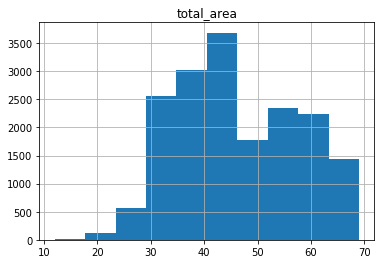

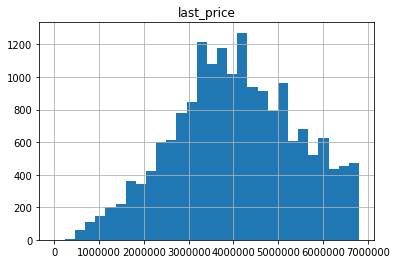

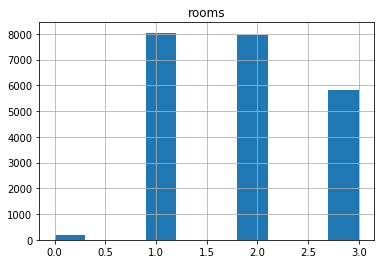

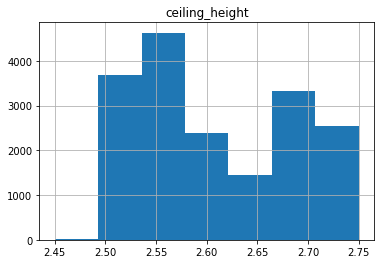

In [44]:
list_hist_des.loc['bins'] = [10, 30, 10,7]
for column in list_hist:
    df.hist(column,bins=(list_hist_des.loc['bins',column].astype('int')),range=(list_hist_des.loc['min',column],list_hist_des.loc['75%',column]))

#### Изучите время продажи квартиры. Постройте гистограмму. Посчитайте среднее и медиану. 

Для постороения гистограмм ставится ограничение в range, чтобы в график не попали NаN'ы, замененные на отрицательное число.

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fd958a06bd0>]],
      dtype=object)

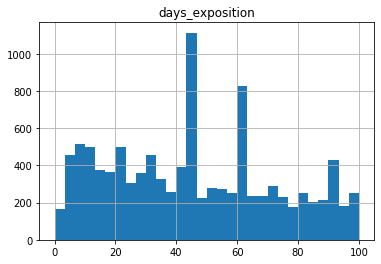

In [45]:
df.hist('days_exposition',bins=30,range=(0,100))

In [46]:
df['days_exposition'][df['days_exposition']>0].mean()

180.95249587196747

In [47]:
df['days_exposition'][df['days_exposition']>0].median()

120.0

Разница между средним и медианым значением отличается в два раза, это происходит, как видно из графика, из-за длиного "хвоста" из больших чисел, которые ощутимо увеличивают среднее значение. Поэтому обычное время продажи лучше смотреть через значение медианы и через график. Самое распростроненное время продажи составляет около 100 дней.

Огромное количество квартир продается в первые дни, поэтому нельзя говорить о каком-то количестве дней, в которые квартира продается аномально быстро. Исходя из графика, необычно долгой можно считать продажу, которая превышает среднее значение (приблизительно 180 дней), потому что к этому моменту большая часть квартир уже продана.

#### редкие и выбивающиеся значения

In [48]:
df.describe()

,total_images,last_price,total_area,rooms,ceiling_height,floors_total,living_area,floor,kitchen_area,balcony,...,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,pr_living_area,pr_kitchen_area,pice_square,first_day_year
count,23699.000000,2.369900e+04,23699.000000,23699.000000,23698.000000,23699.000000,23699.000000,23699.000000,23699.000000,23699.000000,...,23699.000000,23699.000000,23699.000000,23699.000000,23699.000000,23699.000000,23699.000000,23699.000000,2.369900e+04,23699.000000
mean,9.858475,6.541549e+06,60.120511,2.070636,2.706875,10.664121,34.295413,5.892358,12.352336,0.591080,...,10767.660745,0.469049,114.566353,0.590911,167.233554,176.969366,0.564766,0.223632,9.942121e+04,2017.367146
std,5.682529,1.088701e+07,35.665822,1.078405,0.224292,6.587154,22.327807,4.885249,11.028106,0.959298,...,9909.778645,0.748534,678.503370,0.883999,663.755662,216.052257,0.101049,0.131105,5.030681e+04,1.039771
min,0.000000,1.219000e+04,12.000000,0.000000,2.450000,1.000000,2.000000,1.000000,1.000000,0.000000,...,-999.000000,0.000000,-999.000000,0.000000,-999.000000,-999.000000,0.021583,0.025381,1.110000e+02,2014.000000
25%,6.000000,3.400000e+06,40.000000,1.000000,2.550000,5.000000,19.000000,2.000000,7.000000,0.000000,...,2561.500000,0.000000,-999.000000,0.000000,87.500000,45.000000,0.500000,0.136859,7.658500e+04,2017.000000
50%,9.000000,4.650000e+06,52.000000,2.000000,2.650000,9.000000,30.000000,4.000000,10.000000,0.000000,...,11348.000000,0.000000,498.000000,0.000000,520.000000,120.000000,0.564766,0.182292,9.500000e+04,2017.000000
75%,14.000000,6.800000e+06,69.000000,3.000000,2.750000,16.000000,42.000000,8.000000,13.000000,1.000000,...,15319.000000,1.000000,498.000000,1.000000,520.000000,209.000000,0.631579,0.258065,1.142560e+05,2018.000000
max,50.000000,7.630000e+08,900.000000,19.000000,4.450000,60.000000,409.000000,33.000000,282.000000,5.000000,...,65968.000000,3.000000,3190.000000,3.000000,1344.000000,1580.000000,1.000000,0.787879,1.907500e+06,2019.000000


Нужно выбрать числовые признаки и посмотреть, как много чисел выбивается из общих показателей.

In [49]:
list_q=['total_area','living_area','ceiling_height','days_exposition','rooms','floors_total','pr_kitchen_area','pice_square','cityCenters_nearest']

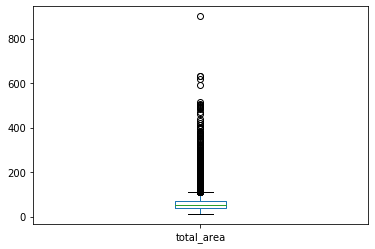

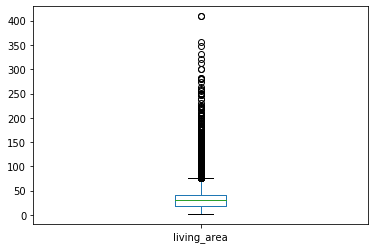

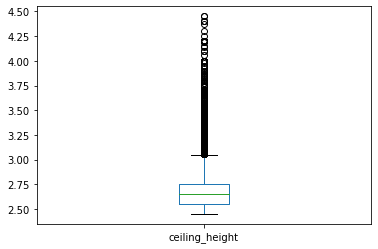

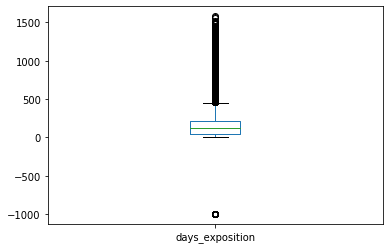

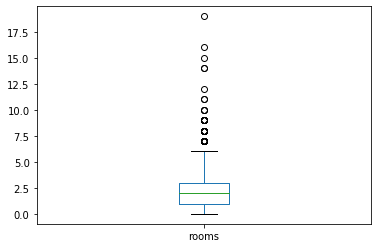

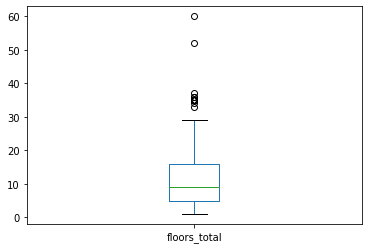

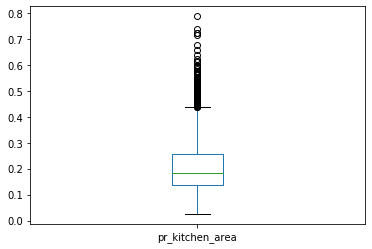

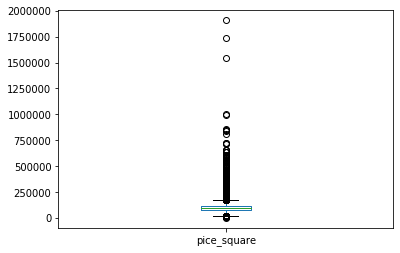

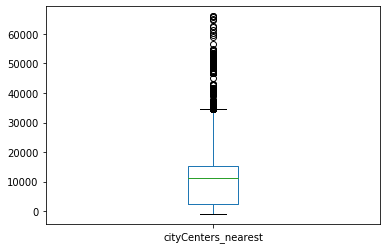

In [50]:
import matplotlib.pyplot as plt
for column in list_q:
    plt.show()
    df[column].plot.box()

Расчитываются квантили, и по ним осуществляется срез редких значений.

In [51]:
for col_col in list_q:
    print(col_col)
    q1 = df[col_col].quantile(0.25)
    print(q1)
    q2 = df[col_col].quantile(0.75)
    print(q2)
    df[col_col] = df[col_col][(df[col_col]>=q1)&(df[col_col]<=q2)] 

total_area
40.0
69.0
living_area
19.0
42.0
ceiling_height
2.55
2.75
days_exposition
45.0
209.0
rooms
1.0
3.0
floors_total
5.0
16.0
pr_kitchen_area
0.13685939521960874
0.25806451612903225
pice_square
76585.0
114256.0
cityCenters_nearest
2561.5
15319.0


In [52]:
df.describe()

,total_images,last_price,total_area,rooms,ceiling_height,floors_total,living_area,floor,kitchen_area,balcony,...,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,pr_living_area,pr_kitchen_area,pice_square,first_day_year
count,23699.000000,2.369900e+04,12051.000000,21801.000000,14259.000000,16793.000000,12203.000000,23699.000000,23699.000000,23699.000000,...,11854.00000,23699.000000,23699.000000,23699.000000,23699.000000,12683.000000,23699.000000,11880.000000,11849.000000,23699.000000
mean,9.858475,6.541549e+06,52.215418,1.897574,2.639055,8.619782,30.181922,5.892358,12.352336,0.591080,...,10339.84520,0.469049,114.566353,0.590911,167.233554,119.272018,0.564766,0.187380,94978.721917,2017.367146
std,5.682529,1.088701e+07,8.415717,0.790781,0.076026,3.566119,6.496681,4.885249,11.028106,0.959298,...,3602.35181,0.748534,678.503370,0.883999,663.755662,52.580518,0.101049,0.034338,10205.806524,1.039771
min,0.000000,1.219000e+04,40.000000,1.000000,2.550000,5.000000,19.000000,1.000000,1.000000,0.000000,...,2564.00000,0.000000,-999.000000,0.000000,-999.000000,45.000000,0.021583,0.136865,76586.000000,2014.000000
25%,6.000000,3.400000e+06,45.000000,1.000000,2.550000,5.000000,26.000000,2.000000,7.000000,0.000000,...,7438.25000,0.000000,-999.000000,0.000000,87.500000,68.000000,0.500000,0.157303,86440.000000,2017.000000
50%,9.000000,4.650000e+06,52.000000,2.000000,2.650000,9.000000,30.000000,4.000000,10.000000,0.000000,...,11348.00000,0.000000,498.000000,0.000000,520.000000,115.000000,0.564766,0.182466,95000.000000,2017.000000
75%,14.000000,6.800000e+06,59.000000,3.000000,2.700000,10.000000,35.000000,8.000000,13.000000,1.000000,...,13265.00000,1.000000,498.000000,1.000000,520.000000,182.000000,0.631579,0.214286,103103.000000,2018.000000
max,50.000000,7.630000e+08,69.000000,3.000000,2.750000,16.000000,42.000000,33.000000,282.000000,5.000000,...,15319.00000,3.000000,3190.000000,3.000000,1344.000000,209.000000,1.000000,0.258065,114253.000000,2019.000000


#### Зависит ли цена от квадратного метра

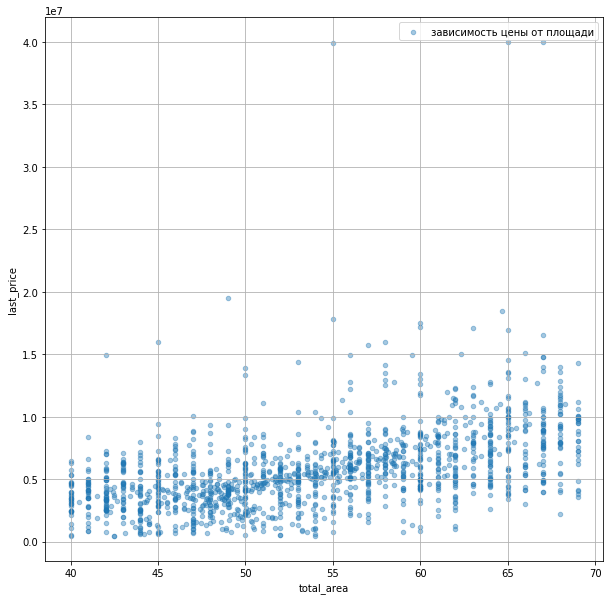

In [53]:
cost_pice_square = df.groupby('last_price')['total_area'].mean().reset_index()
cost_pice_square.plot(x ='total_area', y ='last_price',kind='scatter',grid = True,figsize =(10,10), alpha=0.4,legend=True,label='зависимость цены от площади')

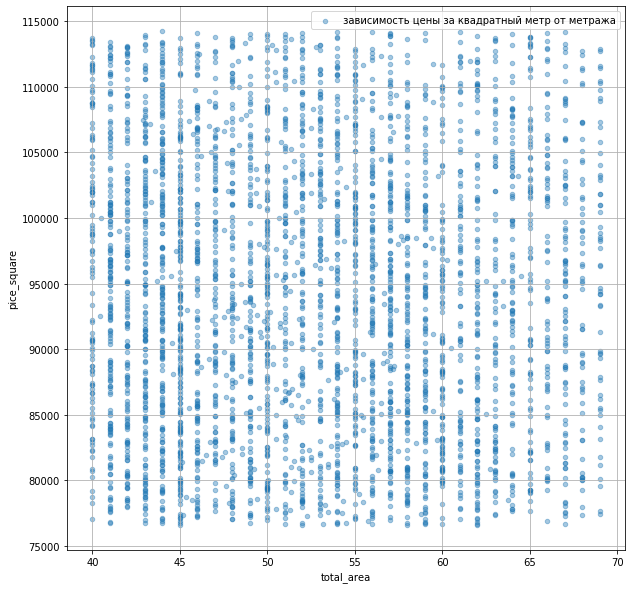

In [54]:
cost_pice_square = df.groupby('pice_square')['total_area'].mean().reset_index()
cost_pice_square.plot(x ='total_area', y ='pice_square',kind='scatter',grid = True,figsize =(10,10), alpha=0.4,legend=True,label='зависимость цены за квадратный метр от метража')

Как видно из графика, чем больше у квартиры квадратных метров, тем она дороже. При этом, чем меньше площадь квартиры, тем дороже цена за квадратный метр. 

##### зависит ли цена от числа комнат

In [55]:
df['rooms']=round(df['rooms'])
cost_pice_square = df.groupby('rooms')['last_price'].mean().reset_index()

In [56]:
fig = px.line(cost_pice_square, x = 'rooms', y = 'last_price', title = 'зависимость цены от числа комнат')
fig.show()

In [57]:
cost_pice_square = df.groupby('rooms')['pice_square'].mean().reset_index()

In [58]:
fig = px.line(cost_pice_square, x = 'rooms', y = 'pice_square', title = 'зависимость цены от числа комнат')
fig.show()

С увеличением числа комнат увеличивается цена, но это может быть связано с увеличением метража. И чем меньше комнат, тем дороже квадратный метр  

Text(0, 0.5, 'last_price')

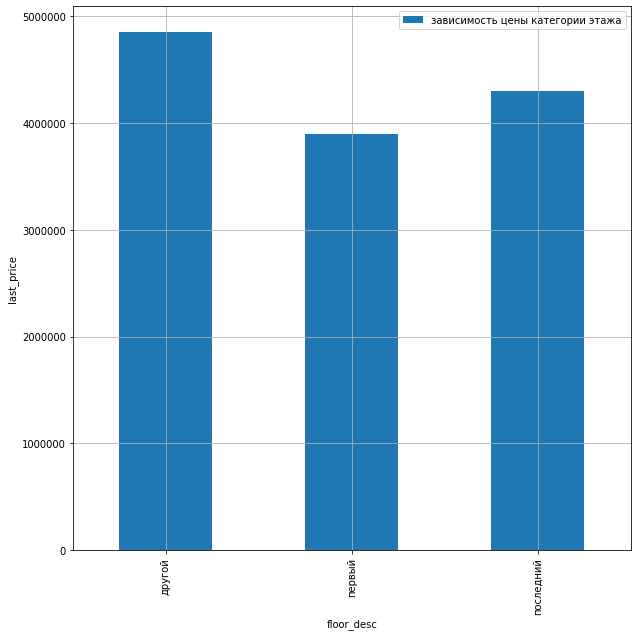

In [59]:
cost_pice_square = df.groupby('floor_desc')['last_price'].median().reset_index()
cost_pice_square.plot(x ='floor_desc', y ='last_price',kind='bar',grid = True,figsize =(10,10),legend=True,label='зависимость цены категории этажа')
plt.xlabel("floor_desc")
plt.ylabel("last_price")

Больше всего людям нравится жить не на первом и не на последнем этаже. На первом могут быть проблемы с шумами с улицы, повышенная вероятность ограбления, на последнем - протекающая крыша. Поэтому самая высокая цена у "других" этажей.

#### зависимость цены от удаленности к центру

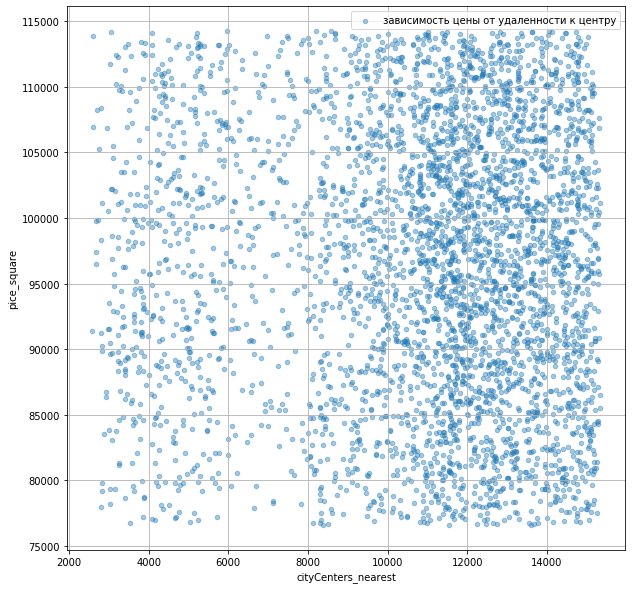

In [60]:
cost_pice_square = df.groupby('pice_square',)['cityCenters_nearest'].mean().reset_index()
cost_pice_square.plot(x ='cityCenters_nearest', y ='pice_square',kind='scatter',grid = True,figsize =(10,10), alpha=0.4,legend=True,label='зависимость цены от удаленности к центру')

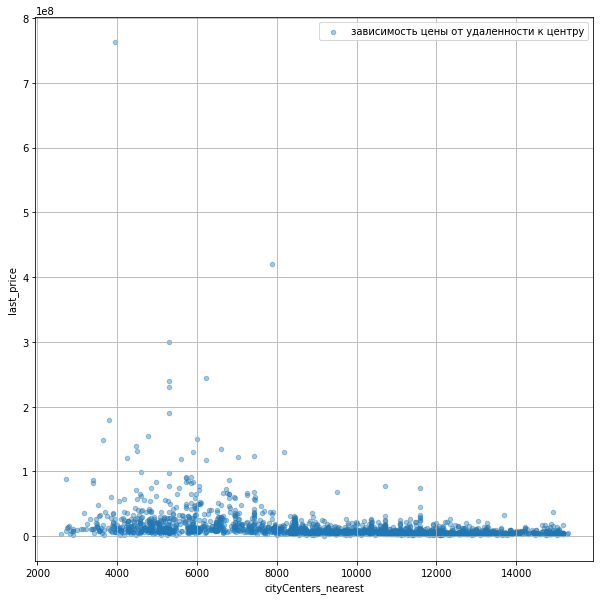

In [61]:
cost_pice_square = df.groupby('last_price',)['cityCenters_nearest'].mean().reset_index()
cost_pice_square.plot(x ='cityCenters_nearest', y ='last_price',kind='scatter',grid = True,figsize =(10,10), alpha=0.4,legend=True,label='зависимость цены от удаленности к центру')

Чем ближе к центру, тем выше цены. При этом цена за квадратный метр самая высокая в диапазоне от 11 до 13 километров. Можно предположить, что на таком удалении от центра находится большое количество квартир с маленьким метражом, где один квадратный метр ценится больше. 

##### зависимость от года

In [62]:
cost_pice_square = df.groupby('first_day_year')['last_price'].mean().reset_index()
#cost_pice_square.plot(x ='first_day_year', y ='last_price',kind='bar',grid = True,figsize =(10,10),legend=True,label='зависимость цены от года')

In [63]:
fig = px.bar(cost_pice_square, x = 'first_day_year', y = 'last_price', title = 'зависимость цены от года')
fig.show()

Самые высокие цены были в 2014 году. Это связано с тем что в 2014 году из-за кризиса все стремились инвестировать свои сбережения. После этого года у населения спала покупательская способность, цены также упали. 

##### зависимость от дня недели

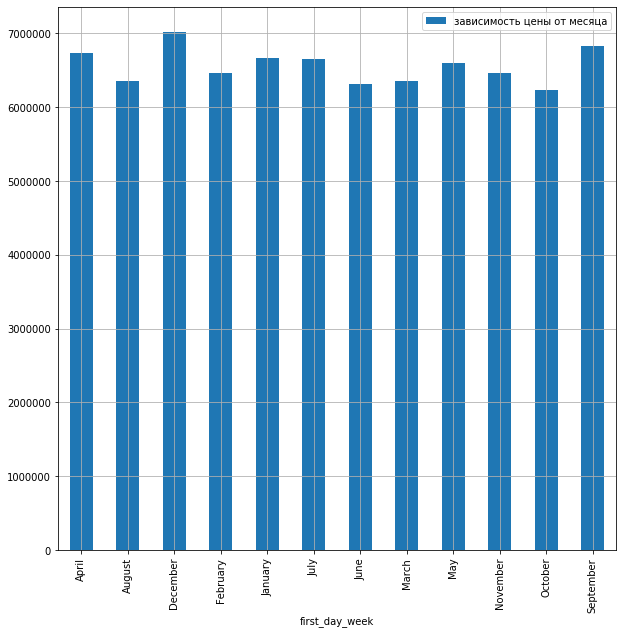

In [64]:
cost_pice_square = df.groupby('first_day_week')['last_price'].mean().reset_index()
cost_pice_square.plot(x ='first_day_week', y ='last_price',kind='bar',grid = True,figsize =(10,10),legend=True,label='зависимость цены от месяца')

В зависимости от дня недели цены варьируются неочень сильно. 

#### варьирование цены в зависимости от месяца

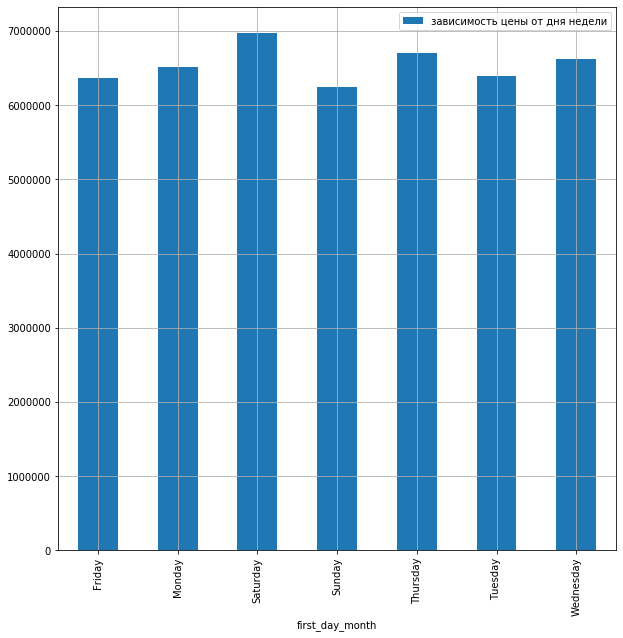

In [65]:
cost_pice_square = df.groupby('first_day_month')['last_price'].mean().reset_index()
cost_pice_square.plot(x ='first_day_month', y ='last_price',kind='bar',grid = True,figsize =(10,10),legend=True,label='зависимость цены от дня недели')

Аналогично, в зависимости от месяца цены на недвижимость меняются неочень сильно. 

In [66]:
df_corr=df.corr()
df_corr=df_corr[abs(df_corr)>0.5]
df_corr

,total_images,last_price,total_area,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,...,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,pr_living_area,pr_kitchen_area,pice_square,first_day_year
total_images,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
last_price,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
total_area,NaN,NaN,1.000000,0.594649,NaN,NaN,0.686007,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
rooms,NaN,NaN,0.594649,1.000000,NaN,NaN,0.783483,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,0.524987,-0.573753,NaN,NaN
ceiling_height,NaN,NaN,NaN,NaN,1.000000,0.578784,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
floors_total,NaN,NaN,NaN,NaN,0.578784,1.000000,NaN,0.544887,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
living_area,NaN,NaN,0.686007,0.783483,NaN,NaN,1.000000,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
floor,NaN,NaN,NaN,NaN,NaN,0.544887,NaN,1.000000,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
is_apartment,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
studio,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


#### Выявление 10 населенных пунктов с наибольшим количеством объявлений.  Определение средней цены квадратного метра в этих населённых пунктах.

In [67]:
#gr_locality_max=(df.pivot_table(index='locality_name',values='pice_square',aggfunc='count')
#                 .sort_values(by='pice_square',ascending= False).head(10))

In [68]:
# КОД РЕВЬЮВЕРА

df.locality_name.value_counts().sort_values(ascending = False).head(10)

санкт-петербург      15721
посёлок мурино         522
посёлок шушары         440
всеволожск             398
пушкин                 369
колпино                338
посёлок парголово      327
гатчина                307
деревня кудрово        299
выборг                 237
Name: locality_name, dtype: int64

In [69]:
#ИСПРАВЛЕННЫЙ КОД
gr_locality_max=df.locality_name.value_counts().sort_values(ascending = False).head(10)

In [70]:
gr_locality_max

санкт-петербург      15721
посёлок мурино         522
посёлок шушары         440
всеволожск             398
пушкин                 369
колпино                338
посёлок парголово      327
гатчина                307
деревня кудрово        299
выборг                 237
Name: locality_name, dtype: int64

In [71]:
gr_locality_max

санкт-петербург      15721
посёлок мурино         522
посёлок шушары         440
всеволожск             398
пушкин                 369
колпино                338
посёлок парголово      327
гатчина                307
деревня кудрово        299
выборг                 237
Name: locality_name, dtype: int64

In [72]:
#gr_locality_max.reset_index(inplace=True)

In [73]:
#gr_locality_max.columns=['locality_name','count']

In [74]:
#gr_locality_max

In [75]:
mean_q_max=df.query('locality_name in @gr_locality_max.index')

In [76]:
mean_q_max

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,ponds_around3000,ponds_nearest,days_exposition,pr_living_area,pr_kitchen_area,pice_square,first_day_year,first_day_month,first_day_week,floor_desc
0,20,13000000,NaN,2019-03-07,3.0,2.70,16.0,NaN,8,False,...,2,755,182.0,0.472222,0.231481,NaN,2019,Thursday,March,другой
1,7,3350000,40.0,2018-12-04,1.0,2.75,11.0,NaN,1,False,...,0,573,81.0,0.460396,NaN,82920.0,2018,Tuesday,December,первый
2,10,5196000,56.0,2015-08-20,2.0,2.55,5.0,34.0,4,False,...,2,574,NaN,0.612500,0.148214,92785.0,2015,Thursday,August,другой
3,0,64900000,NaN,2015-07-24,3.0,2.60,14.0,NaN,9,False,...,3,234,NaN,0.564766,NaN,NaN,2015,Friday,July,другой
4,2,10000000,NaN,2018-06-19,2.0,NaN,14.0,32.0,13,False,...,1,48,121.0,0.320000,NaN,100000.0,2018,Tuesday,June,другой
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23689,13,3550000,NaN,2018-02-28,1.0,NaN,15.0,NaN,4,False,...,2,652,NaN,0.461756,0.257790,100566.0,2018,Wednesday,February,другой
23690,3,5500000,52.0,2018-07-19,2.0,2.55,5.0,31.0,2,False,...,0,520,NaN,0.596154,NaN,105769.0,2018,Thursday,July,другой
23691,11,9470000,NaN,2016-10-13,2.0,2.75,NaN,40.0,7,False,...,1,806,NaN,0.552812,0.145405,NaN,2016,Thursday,October,другой
23694,9,9700000,NaN,2017-03-21,3.0,NaN,5.0,NaN,3,False,...,3,381,182.0,0.547792,NaN,NaN,2017,Tuesday,March,другой


In [77]:
mean_gr_locality_max=mean_q_max.pivot_table(index='locality_name',values='pice_square',aggfunc='mean')

In [78]:
mean_gr_locality_max

,pice_square
locality_name,
всеволожск,84397.132353
выборг,84364.611111
гатчина,85557.054795
деревня кудрово,93231.544061
колпино,86157.942446
посёлок мурино,90928.822102
посёлок парголово,94501.600858
посёлок шушары,88414.870370
пушкин,96609.669091


##### Установление самой высокой и самой низкой стоимости жилья

In [79]:
gr_locality_pv=(df.pivot_table(index='locality_name',values='pice_square',aggfunc='mean')
                 .sort_values(by='pice_square',ascending= False))
gr_locality_pv.reset_index(inplace=True)
gr_locality_pv.columns=['locality_name','mean']
gr_locality_min=gr_locality_pv.tail(10) 
gr_locality_min

,locality_name,mean
64,деревня куттузи,80184.000000
65,поселок городского типа кузьмоловский,80018.000000
66,посёлок тельмана,79897.636364
67,посёлок городского типа рощино,79452.000000
68,деревня кальтино,79342.666667
69,поселок городского типа имени свердлова,79310.000000
70,деревня малые колпаны,78098.000000
71,посёлок аннино,77080.000000
72,посёлок александровская,76966.000000
73,село павлово,76655.000000


In [80]:
gr_locality_max=gr_locality_pv.head(10)
gr_locality_max

,locality_name,mean
0,деревня бор,105539.000000
1,зеленогорск,101203.571429
2,деревня вартемяги,98318.500000
3,кудрово,98123.936170
4,посёлок левашово,96997.000000
5,сестрорецк,96628.976744
6,пушкин,96609.669091
7,санкт-петербург,96216.528902
8,деревня заневка,94949.000000
9,мурино,94684.565217


 #### Определение области, которая входит в  центр Санкт-Петербурга

In [81]:
df_piter=df[df['locality_name']=='санкт-петербург']
df_piter['centre_km']=round(df_piter['cityCenters_nearest']/1000)
df_piter['centre_km']=df_piter['centre_km'].dropna()
df_piter.dropna(subset = ['centre_km'],inplace = True)
df_piter['centre_km']

2        14.0
3         7.0
4         8.0
7        12.0
9        15.0
         ... 
23688    14.0
23690     6.0
23691     4.0
23694     4.0
23697    10.0
Name: centre_km, Length: 11820, dtype: float64

In [82]:
df_piter_gr=df_piter.pivot_table(index='centre_km',values=['last_price'],aggfunc='mean')

In [83]:
df_piter_gr.reset_index(inplace=True)

In [84]:
df_piter_gr

,centre_km,last_price
0,3.0,1.113656e+07
1,4.0,1.330428e+07
2,5.0,1.449912e+07
3,6.0,1.533842e+07
4,7.0,1.477515e+07
5,8.0,9.957717e+06
6,9.0,6.950659e+06
7,10.0,6.504119e+06
8,11.0,6.250815e+06
9,12.0,6.189739e+06


In [85]:
fig = px.line(df_piter_gr, x = 'centre_km', y = 'last_price', title = 'зависимость цены от близости к центру')
fig.show()

Цена резко падает на 7 километрах. Именно на такой удаленности находится центральная зона. 

#### анализ сегмента квартир в центре

In [86]:
df_piter_gr_centre=df_piter.query('centre_km<=7')

In [87]:
df_piter_gr_centre

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,ponds_nearest,days_exposition,pr_living_area,pr_kitchen_area,pice_square,first_day_year,first_day_month,first_day_week,floor_desc,centre_km
3,0,64900000,NaN,2015-07-24,3.0,2.60,14.0,NaN,9,False,...,234,NaN,0.564766,NaN,NaN,2015,Friday,July,другой,7.0
35,6,15500000,NaN,2017-06-26,NaN,2.55,5.0,NaN,4,False,...,779,NaN,0.697987,NaN,104026.0,2017,Monday,June,другой,4.0
51,7,45000000,NaN,2017-10-17,3.0,NaN,8.0,38.0,4,False,...,99,NaN,0.236025,NaN,NaN,2017,Tuesday,October,другой,7.0
52,20,11795000,NaN,2017-09-22,NaN,NaN,NaN,NaN,2,False,...,520,182.0,0.691176,NaN,86727.0,2017,Friday,September,последний,7.0
61,18,7990000,NaN,2017-08-24,2.0,NaN,NaN,NaN,4,False,...,520,NaN,0.581081,NaN,107972.0,2017,Thursday,August,последний,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23665,11,4250000,47.0,2016-05-20,1.0,NaN,6.0,NaN,1,False,...,519,131.0,0.387234,NaN,90425.0,2016,Friday,May,первый,5.0
23681,13,5250000,43.0,2018-05-11,2.0,NaN,5.0,29.0,2,False,...,660,80.0,0.674419,0.139535,NaN,2018,Friday,May,другой,7.0
23690,3,5500000,52.0,2018-07-19,2.0,2.55,5.0,31.0,2,False,...,520,NaN,0.596154,NaN,105769.0,2018,Thursday,July,другой,6.0
23691,11,9470000,NaN,2016-10-13,2.0,2.75,NaN,40.0,7,False,...,806,NaN,0.552812,0.145405,NaN,2016,Thursday,October,другой,4.0


 #### Общее сравнение для всего города и центра

Можно создать столбец, в котором хранится 1, если квартира находится в центре, и 0 - если находится не в центре.

In [88]:
def centr(dis):
    if dis<=7:
        return 'центр' 
    else:
        return 'нецентр'
df_piter['centre_d'] = df_piter['centre_km'].apply(centr)    

In [89]:
df_pv_ta_pl_ch_r=df_piter.pivot_table(index='centre_d',values=['last_price','total_area','rooms','ceiling_height'],aggfunc='mean')
df_pv_ta_pl_ch_r

,ceiling_height,last_price,rooms,total_area
centre_d,,,,
нецентр,2.642258,6.378528e+06,1.890347,51.921862
центр,2.637222,1.405152e+07,2.194686,54.402344


В центре города цены выше, комнат больше, квадратных метров - тоже. Высота потолков примерно одинаковая.

#### учет факторов, которые влияют на стоимость квартиры

##### сравнение количества комнат

Рассматривается то, как меняется цена с изменением количество комнат в центре и в городе в целом. Сначала группируются квартиры и цены в центре, потом  - во всем городе. Затем эти значения совмещяются в одну таблицу.

In [90]:
df_piter_gr_rooms_median=df_piter_gr_centre.pivot_table(index='rooms',values='last_price',aggfunc=['median'])
df_piter_gr_rooms_median.reset_index(inplace=True)
df_piter_gr_rooms_median

,rooms,median
,,last_price
0,1.0,6000000.5
1,2.0,7610814.0
2,3.0,10000000.0


In [91]:
df_piter_gr_rooms_median.columns=['rooms','last_price_count']

In [92]:
df_piter_gr_all_count_rooms=df_piter.pivot_table(index='rooms',values='last_price',aggfunc=['median'])

df_piter_gr_count_rooms_common=df_piter_gr_all_count_rooms.merge(df_piter_gr_rooms_median, on='rooms', how='outer') 
df_piter_gr_count_rooms_common.columns=['rooms','last_price_count_piter','last_price_count_centre']
df_piter_gr_count_rooms_common

,rooms,last_price_count_piter,last_price_count_centre
0,1.0,4200000,6000000.5
1,2.0,5800000,7610814.0
2,3.0,7600000,10000000.0


Text(0, 0.5, 'last_price')

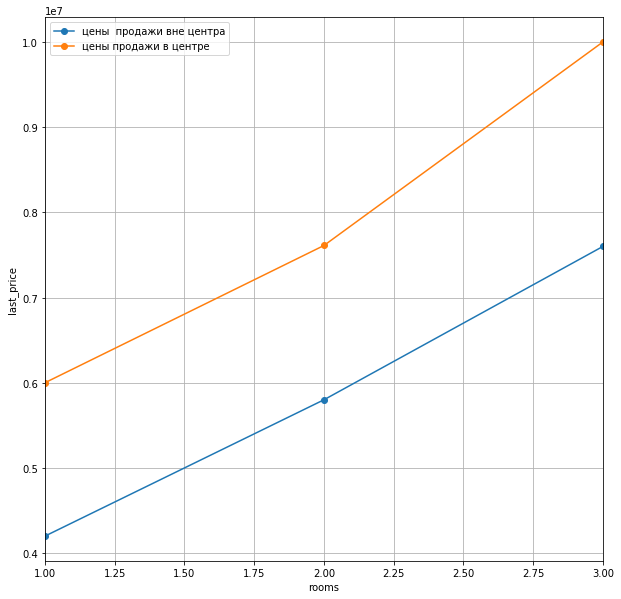

In [93]:
df_piter_gr_count_rooms_common.plot(x ='rooms', y =['last_price_count_piter','last_price_count_centre'], style='o-',grid = True,figsize =(10,10),legend=True,label=['цены  продажи вне центра','цены продажи в центре'])
plt.xlabel("rooms")
plt.ylabel("last_price")

Динамика для всего города и центра одинаковая: с увеличением числа комнат увеличивается цена. Это может быть связано с тем, что чем больше комнат, тем сами квартиры больше. 

##### Сравнение этажей

Рассматривается то, как меняется цена с изменением этажа в центре и в городе в целом. Сначала группируются квартиры и цены в центре, потом  - во всем городе. Затем эти значения совмещяются в одну таблицу.

In [94]:
df_piter_gr_sum=df_piter.pivot_table(index='floor',values='last_price',aggfunc=['median'])
df_piter_gr_sum

,median
,last_price
floor,
1,4900000
2,5875000
3,6000000
4,6250000
5,5550000
6,6100000
7,5625000
8,5500000


In [95]:
df_piter_gr_centre_sum=df_piter_gr_centre.pivot_table(index='floor',values='last_price',aggfunc=['median','count'])

In [96]:
df_piter_gr_centre_sum.reset_index(inplace=True)

In [97]:
df_piter_gr_centre_sum.columns=['floor','last_price_median_centre','last_price_count_centre']
df_piter_gr_centre_sum

,floor,last_price_median_centre,last_price_count_centre
0,1,6450000.0,311
1,2,8900000.0,549
2,3,8419000.0,534
3,4,9040000.0,482
4,5,9025000.0,400
5,6,10649000.0,208
6,7,10940050.0,138
7,8,10700000.0,93
8,9,9150000.0,81
9,10,12100000.0,59


В строке с девятым этажом получилось очень большое  медианое значение. Разумней не учитывать данные, где расчет брался из малого количества строк. 

In [98]:
df_piter_gr_centre_sum=df_piter_gr_centre_sum.query('last_price_count_centre>=10')

In [99]:
df_piter_gr_sum=df_piter.pivot_table(index='floor',values='last_price',aggfunc=['median'])


In [100]:
df_piter_gr_count_common=df_piter_gr_sum.merge(df_piter_gr_centre_sum, on='floor', how='outer') 

In [101]:
df_piter_gr_count_common.columns=['floor','last_price_median_piter','last_price_median_centre','last_price_count_centre']
df_piter_gr_count_common

,floor,last_price_median_piter,last_price_median_centre,last_price_count_centre
0,1,4900000,6450000.0,311.0
1,2,5875000,8900000.0,549.0
2,3,6000000,8419000.0,534.0
3,4,6250000,9040000.0,482.0
4,5,5550000,9025000.0,400.0
5,6,6100000,10649000.0,208.0
6,7,5625000,10940050.0,138.0
7,8,5500000,10700000.0,93.0
8,9,5390000,9150000.0,81.0
9,10,6295000,12100000.0,59.0


Text(0, 0.5, 'last_price')

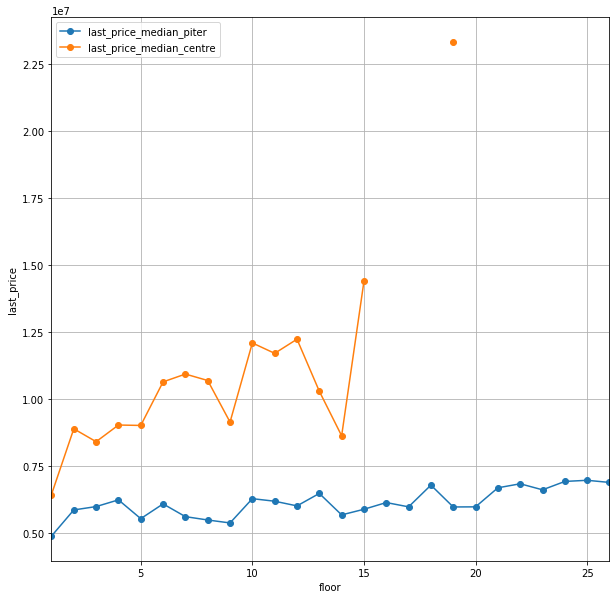

In [102]:
df_piter_gr_count_common.plot(x ='floor', y =['last_price_median_piter','last_price_median_centre'], style='o-',grid = True,figsize =(10,10),legend=True)
plt.xlabel("floor")
plt.ylabel("last_price")

- В центре в принципе нет высоких этажей, что связано с возрастом зданий.
- Динамика цен в центре и во всем городе одинаковая. Зубчатость  нижнего графика может быть связана с тем, что пятый, девятый и т. д. этажи - это последние этажи для некоторых серий зданий. 

За пределами центра разница в цене за категорию не такая большая, как в центре. Это может быть связано с тем, что в центре бродит куда больше "случайных" людей. Самыми привлекательными оказались последие этажи. Динамика, что в центре, что за его пределами одинаковая. 

In [104]:
df_piter_gr_centre_sum=df_piter.pivot_table(index='cityCenters_nearest',values='last_price',aggfunc='median')
df_piter_gr_centre_sum.reset_index(inplace=True)

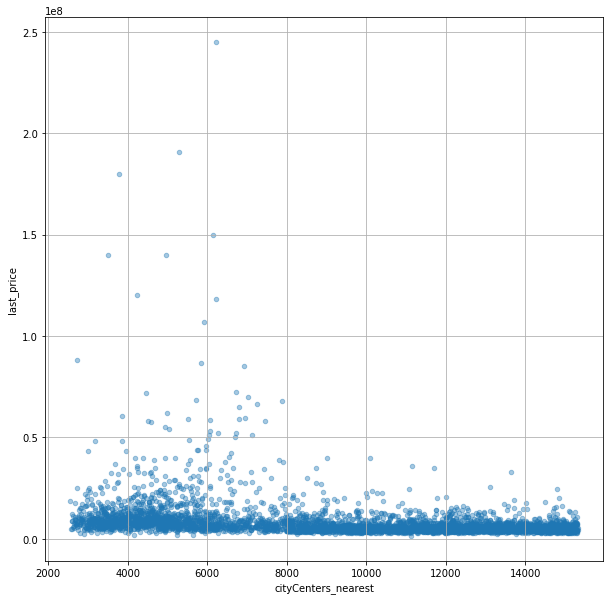

In [105]:
df_piter_gr_centre_sum.plot(x ='cityCenters_nearest', y ='last_price',kind='scatter',grid = True,figsize =(10,10),alpha=0.4)

Чем ближе к центру, тем выше цены

In [106]:
df_piter.columns

Index(['total_images', 'last_price', 'total_area', 'first_day_exposition',
       'rooms', 'ceiling_height', 'floors_total', 'living_area', 'floor',
       'is_apartment', 'studio', 'open_plan', 'kitchen_area', 'balcony',
       'locality_name', 'airports_nearest', 'cityCenters_nearest',
       'parks_around3000', 'parks_nearest', 'ponds_around3000',
       'ponds_nearest', 'days_exposition', 'pr_living_area', 'pr_kitchen_area',
       'pice_square', 'first_day_year', 'first_day_month', 'first_day_week',
       'floor_desc', 'centre_km', 'centre_d'],
      dtype='object')

 Можно посмотреть влияение парков и прудов на цену. Для чистоты анализа разумно сделать срез с примерно одинаковыми метражами квартир.  

In [107]:
df_piter_centre_total_area=df_piter_gr_centre.query('20<total_area<70')

In [108]:
df_piter_gr_centre_total_area=df_piter_centre_total_area.pivot_table(index='ponds_around3000',values='last_price',aggfunc=['mean','count'])
df_piter_gr_centre_total_area.reset_index(inplace=True)
df_piter_gr_centre_total_area

,ponds_around3000,mean,count
,,last_price,last_price
0,0,7.058608e+06,299
1,1,7.064408e+06,417
2,2,6.808853e+06,140
3,3,7.361395e+06,168


Наличие рядом прудов для квартир в центре роли не играет. Можно сравнить со всем городом. 

In [109]:
df_piter_total_area=df_piter.query('20<total_area<70')

In [110]:
df_piter_gr_total_area=df_piter_total_area.pivot_table(index='ponds_around3000',values='last_price',aggfunc=['mean','count'])
df_piter_gr_total_area.reset_index(inplace=True)
df_piter_gr_total_area

,ponds_around3000,mean,count
,,last_price,last_price
0,0,5.518596e+06,3186
1,1,5.667623e+06,1840
2,2,6.186749e+06,456
3,3,7.208052e+06,290


Во всем городе наличие прудов учеличивает цену на жилье. В квартирах в центре это может не так проявляться, так как на цену прежде всего влияет близость к центру.

Анализ наличия парков. 

In [111]:
df_piter_gr_parks=df_piter_centre_total_area.pivot_table(index='parks_around3000',values='last_price',aggfunc=['mean','count'])
df_piter_gr_parks.reset_index(inplace=True)
df_piter_gr_parks

,parks_around3000,mean,count
,,last_price,last_price
0,0,7.065172e+06,401
1,1,7.032163e+06,421
2,2,7.056240e+06,160
3,3,7.706262e+06,42


In [112]:
df_piter_gr_total_area=df_piter_total_area.pivot_table(index='parks_around3000',values='last_price',aggfunc=['mean','count'])
df_piter_gr_total_area.reset_index(inplace=True)
df_piter_gr_total_area

,parks_around3000,mean,count
,,last_price,last_price
0,0,5.569466e+06,3009
1,1,5.846039e+06,2066
2,2,5.816600e+06,596
3,3,6.129019e+06,101


Наличие парка в любом случае увеличивает цену на жилье.

In [113]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 29 columns):
total_images            23699 non-null int64
last_price              23699 non-null int64
total_area              12051 non-null float64
first_day_exposition    23699 non-null datetime64[ns]
rooms                   21801 non-null float64
ceiling_height          14259 non-null float64
floors_total            16793 non-null float64
living_area             12203 non-null float64
floor                   23699 non-null int64
is_apartment            23699 non-null bool
studio                  23699 non-null bool
open_plan               23699 non-null bool
kitchen_area            23699 non-null int64
balcony                 23699 non-null int64
locality_name           23699 non-null object
airports_nearest        23699 non-null int64
cityCenters_nearest     11854 non-null float64
parks_around3000        23699 non-null int64
parks_nearest           23699 non-null int64
ponds_around3000 

In [114]:
spb_floor = df_piter.pivot_table(index = ['first_day_year', 'centre_d'], values = 'last_price', aggfunc = 'mean').reset_index()
display(spb_floor)

fig = px.line(spb_floor, x = 'first_day_year', color = 'centre_d', y = 'last_price', title = 'Изменение цены в зав-ти от года в центре и за его переделами')
fig.show()


,first_day_year,centre_d,last_price
0,2014,нецентр,1.093610e+07
1,2014,центр,2.035023e+07
2,2015,нецентр,6.694891e+06
3,2015,центр,1.630124e+07
4,2016,нецентр,6.094256e+06
5,2016,центр,1.498597e+07
6,2017,нецентр,6.232510e+06
7,2017,центр,1.466139e+07
8,2018,нецентр,6.335922e+06
9,2018,центр,1.224608e+07


По годам в центре наблюдается более плавный спад цен.

In [115]:
spb_floor = df_piter.pivot_table(index = ['first_day_month', 'centre_d'], values = 'last_price', aggfunc = 'mean').reset_index()
display(spb_floor)

fig = px.line(spb_floor, x = 'first_day_month', color = 'centre_d', y = 'last_price', title = 'Изменение цены в зав-ти от дня недели в центре и за его переделами')
fig.show()

,first_day_month,centre_d,last_price
0,Friday,нецентр,6.011194e+06
1,Friday,центр,1.438127e+07
2,Monday,нецентр,6.514645e+06
3,Monday,центр,1.386640e+07
4,Saturday,нецентр,6.508244e+06
5,Saturday,центр,1.873332e+07
6,Sunday,нецентр,6.237788e+06
7,Sunday,центр,1.479336e+07
8,Thursday,нецентр,6.524071e+06
9,Thursday,центр,1.313441e+07


За пределами центра цена практически  не меняется. В центре цена более чувствительна к дням недели.

In [116]:
spb_floor = df_piter.pivot_table(index = ['first_day_week', 'centre_d'], values = 'last_price', aggfunc = 'mean').reset_index()
display(spb_floor)
fig = px.line(spb_floor, x = 'first_day_week', color = 'centre_d', y = 'last_price', title = 'Изменение цены в зав-ти от дня недели в центре и за его переделами')
fig.show()

,first_day_week,centre_d,last_price
0,April,нецентр,6.441736e+06
1,April,центр,1.433030e+07
2,August,нецентр,6.178644e+06
3,August,центр,1.239777e+07
4,December,нецентр,7.427025e+06
5,December,центр,1.450787e+07
6,February,нецентр,6.231821e+06
7,February,центр,1.352410e+07
8,January,нецентр,6.448563e+06
9,January,центр,1.548856e+07


Цена за пределами центра в зависимости от месяца меняется не так сильно, в отличие от цен в центре. 

# Шаг 5. Общий вывод.

- высокие расценки за жилплощадь можно найти не только в Санкт-Петербурге, но и в некоторых частях Ленинградской области, и эти расценки не будут подозрительными.
- во всех случаях на цену квартиры влияет количество комнат, метраж, этаж(относительно этажности, т.к. люди последний этаж покупают менее охотно), наличие парка 
- в Санкт-Петербурге главную роль в ценообразовании играет близость квартиры к центру города
- вне центра Санкт-Петербурга на цену может повлиять наличие водоемов
- чем ближе к центру, тем выше цены    
- в центре гораздо менее охотно покупают квартиры на первом этаже   
- в любом случае чем меньше площадь квартиры, тем выше цена за квадратный метр 
- цены квартир в центре Спб более чувствительны к изменениям дня недели, месяца в отличие квартир за пределами центра     
- наиболее распространненной квартирой можно назвать однокомнатную или двухкомнатную квартиру с потолками 2.50-2.55 метров, метражом 30-45 квадратных метров, и ценой в 3-4.5 млн